In [105]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv("/kaggle/input/veersa-hack/heart_failure_readmission_data_2.csv") 

In [107]:
df_fe = df.copy()

In [108]:
print(df_fe.columns)


Index(['age_at_admission', 'length_of_stay', 'total_diagnoses',
       'total_procedures', 'prev_admissions', 'days_since_last_admission',
       'drg_severity', 'drg_mortality', 'unique_lab_tests', 'total_lab_count',
       'readmitted_30days', 'gender_M', 'admission_type_EMERGENCY',
       'admission_type_URGENT', 'discharge_location_DISCH-TRAN TO PSYCH HOSP',
       'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE',
       'discharge_location_HOME WITH HOME IV PROVIDR',
       'discharge_location_HOSPICE-HOME', 'discharge_location_ICF',
       'discharge_location_LEFT AGAINST MEDICAL ADVI',
       'discharge_location_LONG TERM CARE HOSPITAL',
       'discharge_location_OTHER FACILITY',
       'discharge_location_REHAB/DISTINCT PART HOSP',
       'discharge_location_SHORT TERM HOSPITAL', 'discharge_location_SNF',
       'insurance_Medicaid', 'insurance_Medicare', 'insurance_Private',
       'insurance_Self Pay'],
      dtype='object')


In [109]:
df_fe['criticality_score'] = df_fe['drg_severity'] * df_fe['drg_mortality']
print(df_fe['criticality_score'])

0       12.0
1       12.0
2       12.0
3       12.0
4       12.0
        ... 
3272    12.0
3273     9.0
3274    12.0
3275     9.0
3276    12.0
Name: criticality_score, Length: 3277, dtype: float64


In [110]:
df_fe['chronicity_index'] = df_fe['prev_admissions'] * df_fe['length_of_stay']
df_fe.drop(['prev_admissions', 'length_of_stay'], axis=1, inplace=True)

In [111]:
df_fe['procedure_intensity'] = df['total_procedures'] / (df['length_of_stay'] + 1e-5)
df_fe.drop(['total_procedures'], axis=1, inplace=True)
print(df_fe['procedure_intensity'])

0       0.210526
1       0.333333
2       0.250000
3       0.250000
4       1.285712
          ...   
3272    0.249999
3273    1.666661
3274    0.000000
3275    0.200000
3276    0.166666
Name: procedure_intensity, Length: 3277, dtype: float64


In [112]:
df_fe['repeat_test_rate'] = df_fe['total_lab_count'] / (df_fe['unique_lab_tests'] + 1e-5)

In [113]:
target = 'readmitted_30days'
X = df_fe.drop(columns=[target])
y = df_fe[target]


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [116]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

<Axes: >

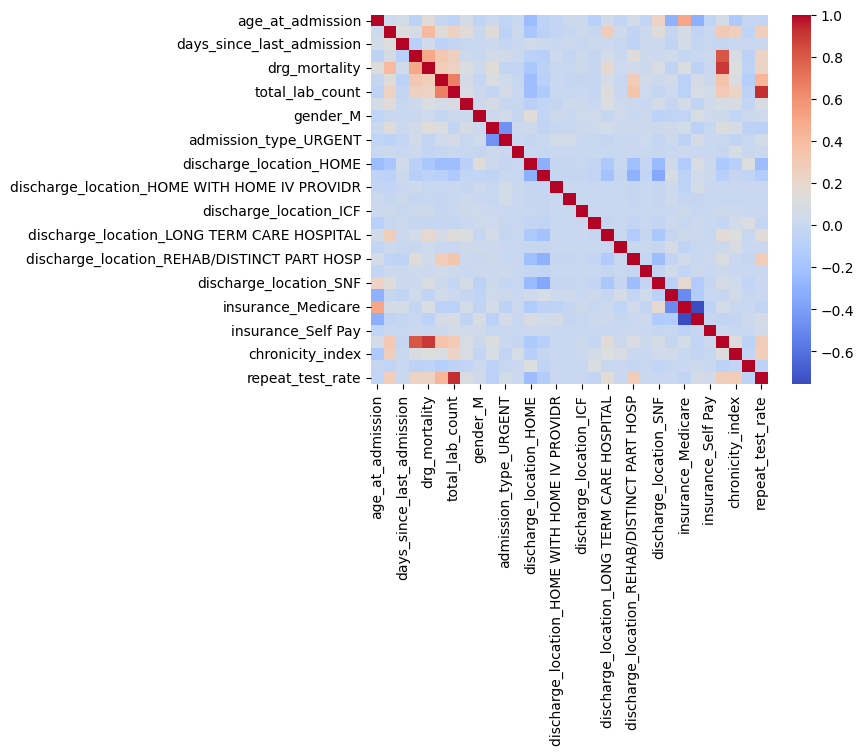

In [117]:
corr = df_fe.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')


In [118]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7240853658536586
Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.96      0.84       482
        True       0.38      0.06      0.11       174

    accuracy                           0.72       656
   macro avg       0.56      0.51      0.47       656
weighted avg       0.64      0.72      0.64       656



In [119]:
df_fe.to_csv("heart_failure_readmission_data_engineered2.csv", index=False)